In [195]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import  MultiOutputRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, f1_score,jaccard_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

%matplotlib inline

monster_df = pd.read_csv('../data/processed/Monster_modeling_df.csv')

monster_df.drop(columns={"Unnamed: 0", "Monster Name", "Size",'Type','Alignment'},axis=1, inplace=True)
monster_df.head()



ModuleNotFoundError: No module named 'tensorflow'

In [3]:
#Input Variables: Size, Type, Environment, Alignment, CR(disguised as 4x player level)
#Output Variables: Stats, Saving Throws, Traits(barebones), Attack Bonus, Damage per Round, Reactions (y/n), Legendary Actions (y/n)

LinearRegression (and related)
KNeighborsRegressor
DecisionTreeRegressor
RandomForestRegressor (and related)

In [4]:
monster_df.columns

Index(['Traits', 'Reactions', 'Armor Class', 'Hit Points', 'Challenge',
       'Proficiency Bonus', 'STR', 'DEX', 'CON', 'INT', 'WIS', 'CHA',
       'Legendary Actions', 'Attack_Bonus', 'Spell_Bonus', 'Spell_Save_DC',
       'WIS_SV', 'INT_SV', 'CHA_SV', 'STR_SV', 'DEX_SV', 'CON_SV', 'Arctic',
       'Coastal', 'Desert', 'Forest', 'Grassland', 'Hill', 'Mountain', 'NA',
       'Swamp', 'Underdark', 'Underwater', 'Urban', 'Average_Damage_per_Round',
       'Damage Resistances', 'Damage Immunities', 'Condition Immunities',
       'Damage Vulnerabilities', 'Spellcaster', 'Magic Resistance',
       'Legendary Resistance', 'Regeneration', 'Undead Fortitude',
       'Pack Tactics', 'Damage Transfer', 'Angelic Weapons', 'Charge',
       'size_ordinal', 'aberration', 'beast', 'celestial', 'construct',
       'dragon', 'elemental', 'fey', 'fiend', 'giant', 'humanoid',
       'monstrosity', 'ooze', 'plant', 'swarm', 'undead', 'any alignment',
       'any chaotic alignment', 'any evil alignment', 

In [204]:
## Train Test Split

X = monster_df[['Coastal','Arctic','Desert','Forest','Grassland', 'Hill', 'Mountain', 'NA', 'Swamp', 'Underdark','Underwater', 'Urban','size_ordinal', 'aberration', 'beast',
       'celestial', 'construct', 'dragon', 'elemental', 'fey', 'fiend',
       'giant', 'humanoid', 'monstrosity', 'ooze', 'plant', 'swarm', 'undead',
       'any alignment', 'any chaotic alignment', 'any evil alignment',
       'any non-good alignment', 'any non-lawful alignment', 'chaotic evil',
       'chaotic good', 'chaotic neutral', 'lawful evil', 'lawful good',
       'lawful neutral', 'neutral', 'neutral evil', 'neutral good',
       'unaligned','Challenge']]

Y = monster_df[['Hit Points','Armor Class','Proficiency Bonus','STR','CON','WIS','INT','CHA', 'STR_SV','DEX_SV','CON_SV','WIS_SV','INT_SV','CHA_SV', 'Attack_Bonus','Average_Damage_per_Round','Legendary Actions', 'Damage Resistances',
       'Damage Immunities', 'Condition Immunities', 'Damage Vulnerabilities',
       'Legendary Resistance', 'Magic Resistance']]




x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=42)




## Linear Regression for Multioutput Regression

In [159]:
model = (LinearRegression())
model.fit(x_train, y_train)
print("Training Score: ", model.score(x_train, y_train))
print("Testing Score: ",model.score(x_test, y_test))
yhat_l = model.predict(x_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, yhat_l))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, yhat_l))
scores = cross_val_score(model,X,Y,cv=5)
print(scores.mean())

Training Score:  0.7255546857828182
Testing Score:  0.6141694711075617
Mean squared error: 190.03
Coefficient of determination: 0.61
0.5420279945139947


## k-Nearest Neighbors for Multioutput Regression

In [158]:
model_k = (KNeighborsRegressor())
model_k.fit(x_train, y_train)
print("Training Score: ", model_k.score(x_train, y_train))
print("Testing Score: ",model_k.score(x_test, y_test))
yhat_k = model_k.predict(x_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, yhat_k))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, yhat_k))
scores = cross_val_score(model_k,X,Y,cv=5)
print(scores.mean())

Training Score:  0.6933528668886569
Testing Score:  0.6252096348127729
Mean squared error: 160.47
Coefficient of determination: 0.63
0.5050713193467039


## Decision Tree Regressor for Multioutput Regression

In [174]:
model_D = MultiOutputRegressor(DecisionTreeRegressor(random_state=0))
model_D.fit(x_train, y_train)
print("Training Score: ", model_D.score(x_train, y_train))
print("Testing Score: ",model_D.score(x_test, y_test))
yhat_d = model_D.predict(x_test)

baseline_MSE = mean_squared_error(y_test, yhat_d)
baseline_r2 = r2_score(y_test, yhat_d)

print("Mean squared error: %.2f" % baseline_MSE)
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % baseline_r2)
scores = cross_val_score(model_D,X,Y,cv=5)
print(scores.mean())

Training Score:  0.9887761611262125
Testing Score:  0.5636357220529693
Mean squared error: 57.23
Coefficient of determination: 0.56
0.4503232848888599


## Random Forest Regression

In [205]:
model_R = RandomForestRegressor(n_estimators = 1000, random_state=0)
model_R.fit(x_train, y_train)
print("Training Score: ", model_R.score(x_train, y_train))
print("Testing Score: ",model_R.score(x_test, y_test))
yhat_r = model_R.predict(x_test)

baseline_MSE = mean_squared_error(y_test, yhat_r)
baseline_r2 = r2_score(y_test, yhat_r)

print("Mean squared error: %.2f" % baseline_MSE)
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % baseline_r2)


Training Score:  0.935308121793038
Testing Score:  0.6539247777369012
Mean squared error: 25.63
Coefficient of determination: 0.65


## Tuning the Random Forest Regressor


In [198]:
## Feature Importance
feature_list = X.columns
# Get numerical feature importances
importances = list(model_R.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]


Variable: Challenge            Importance: 0.86
Variable: size_ordinal         Importance: 0.07
Variable: dragon               Importance: 0.01
Variable: unaligned            Importance: 0.01
Variable: Coastal              Importance: 0.0
Variable: Arctic               Importance: 0.0
Variable: Desert               Importance: 0.0
Variable: Forest               Importance: 0.0
Variable: Grassland            Importance: 0.0
Variable: Hill                 Importance: 0.0
Variable: Mountain             Importance: 0.0
Variable: NA                   Importance: 0.0
Variable: Swamp                Importance: 0.0
Variable: Underdark            Importance: 0.0
Variable: Underwater           Importance: 0.0
Variable: Urban                Importance: 0.0
Variable: aberration           Importance: 0.0
Variable: beast                Importance: 0.0
Variable: celestial            Importance: 0.0
Variable: construct            Importance: 0.0
Variable: elemental            Importance: 0.0
Variable:

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

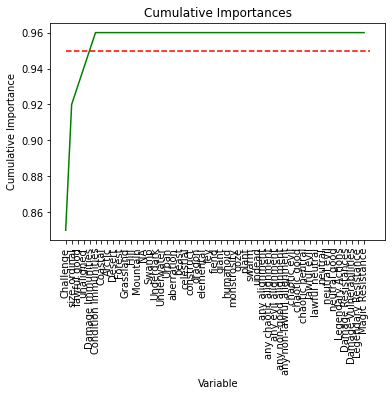

In [164]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(feature_list, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(feature_list, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [165]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 6


c:\Users\ingal\Documents\Data Science Work\DnD_Monsters\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\ingal\Documents\Data Science Work\DnD_Monsters\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


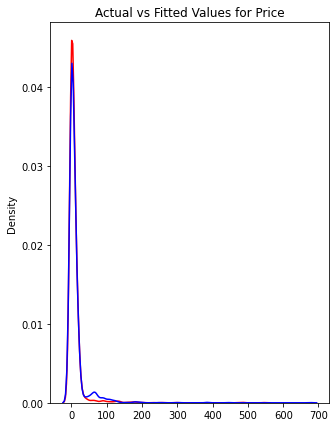

In [210]:

plt.figure(figsize=(5, 7));


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value");
sns.distplot(yhat_d, hist=False, color="b", label="Fitted Values" , ax=ax);


plt.title('Actual vs Fitted Values for Price');


plt.show();
plt.close();


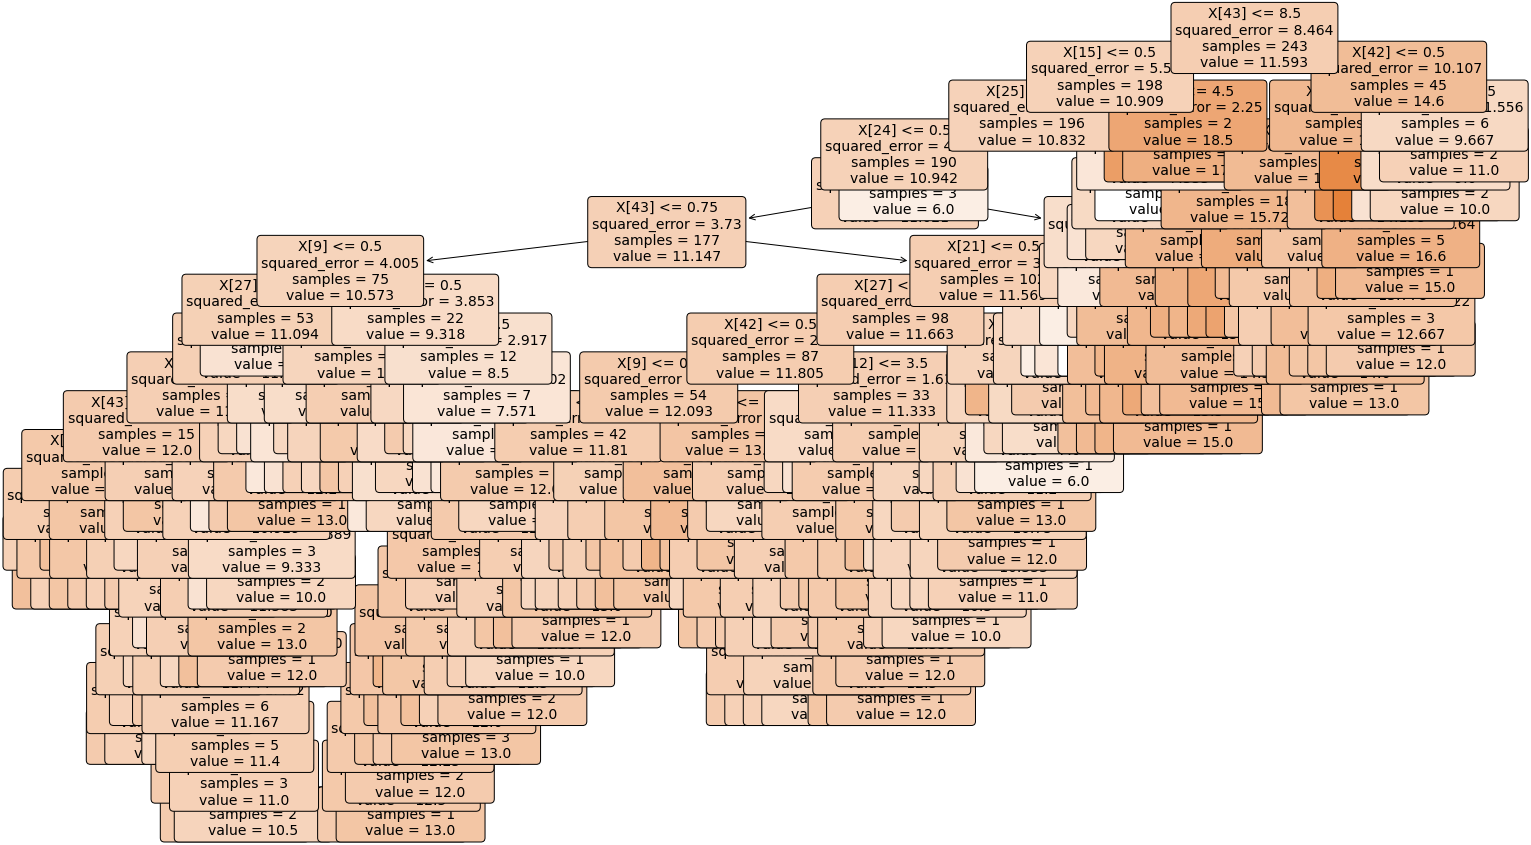

In [211]:
import pydot
# Pull out one tree from the forest
Tree = model_D.estimators_[5]
# Export the image to a dot file
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(Tree,filled=True, 
              rounded=True, 
              fontsize=14);
